In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Practical 04

In [143]:
suv_df = pd.read_csv('Datasets/suv_data.csv')
suv_df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [144]:
suv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [145]:
suv_df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [146]:
# One hot encoding gender
suv_df = pd.get_dummies(data=suv_df, columns=['Gender'], prefix='Gender')
suv_df.head(10)

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True
5,15728773,27,58000,0,False,True
6,15598044,27,84000,0,True,False
7,15694829,32,150000,1,True,False
8,15600575,25,33000,0,False,True
9,15727311,35,65000,0,True,False


In [147]:
suv_df['Id_num'] = suv_df['User ID'].apply(lambda x: x//10000)

<Axes: >

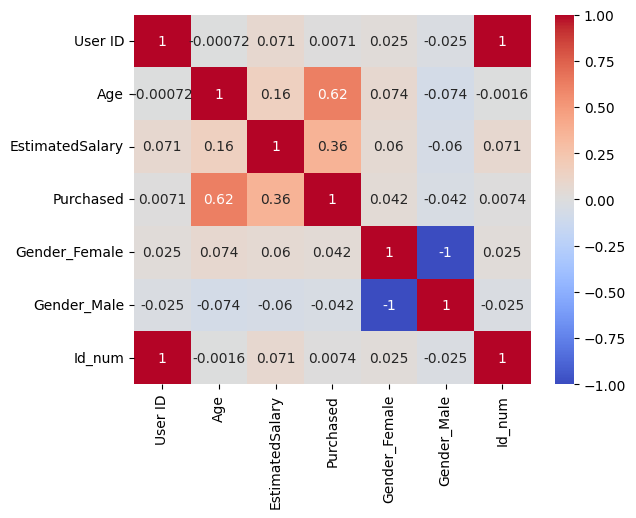

In [148]:
corr_mat = suv_df.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

In [149]:
# Dropping not relevant columns
suv_df.drop(['User ID', 'Id_num', 'Gender_Female', 'Gender_Male'], axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='Density'>

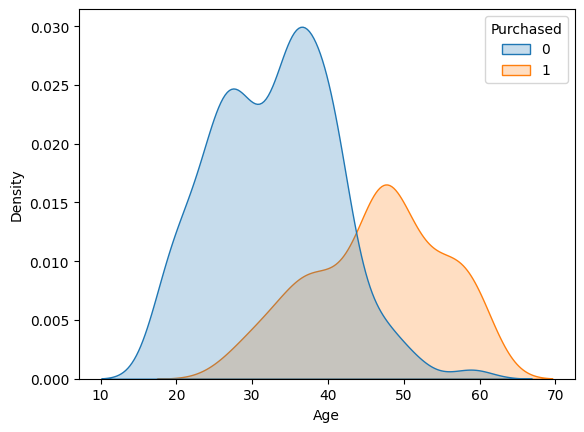

In [150]:
sns.kdeplot(data=suv_df, x='Age', hue='Purchased', fill=True)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

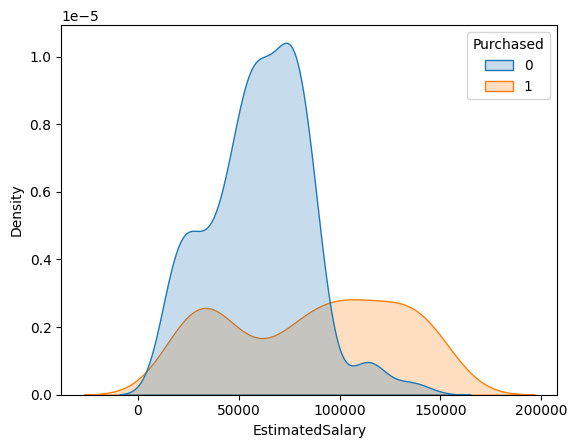

In [151]:
sns.kdeplot(data=suv_df, x='EstimatedSalary', hue='Purchased', fill=True)

# Building Model

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [153]:
# Without under sampling
X_train, X_test, y_train, y_test = train_test_split(suv_df.drop('Purchased', axis=1), suv_df['Purchased'], test_size=0.3, random_state=10)

In [154]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [155]:
print('accuracy: ', accuracy_score(y_test, model.predict(X_test))*100)
report = classification_report(y_test, model.predict(X_test), output_dict=True)
pd.DataFrame(report).transpose()

accuracy:  83.33333333333334


,precision,recall,f1-score,support
0,0.838710,0.939759,0.886364,83.000000
1,0.814815,0.594595,0.687500,37.000000
accuracy,0.833333,0.833333,0.833333,0.833333
macro avg,0.826762,0.767177,0.786932,120.000000
weighted avg,0.831342,0.833333,0.825047,120.000000


## Here Recall is low while precision is high. This means our model is not able to identify all the positive classes but whatever it is identifying as positive is correct. This is usually because our dataset has imbalance for the target variable. We can try to oversample 1 or undersample 0 to improve the recall.

In [188]:
# UnderSampling the 'no' data
yes_df = suv_df[suv_df['Purchased'] == 1]
no_df = suv_df[suv_df['Purchased'] == 0]
my_df = pd.concat([yes_df, no_df.sample(n=150, random_state=69)])

In [189]:
# For Undersampled data
X_train, X_test, y_train, y_test = train_test_split(my_df.drop('Purchased', axis=1), my_df['Purchased'], test_size=0.2, random_state=69)

Best k_val:  1


<Axes: >

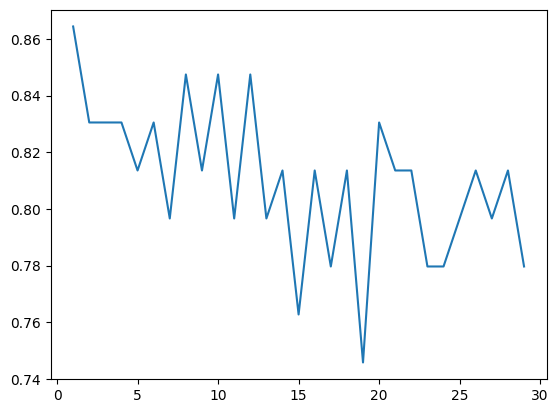

In [190]:
# Testing for best k value
acc = []
best = 0
best_k = 0
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    if accuracy_score(y_test, y_pred) > best:
        best = accuracy_score(y_test, y_pred)
        best_k = i
print('Best k_val: ', best_k)
sns.lineplot(x=range(1, 30), y=acc)

In [193]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [194]:
print('Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
report = classification_report(y_test, model.predict(X_test), output_dict=True)
pd.DataFrame(report).transpose()

Accuracy:  0.864406779661017


,precision,recall,f1-score,support
0,0.878788,0.878788,0.878788,33.000000
1,0.846154,0.846154,0.846154,26.000000
accuracy,0.864407,0.864407,0.864407,0.864407
macro avg,0.862471,0.862471,0.862471,59.000000
weighted avg,0.864407,0.864407,0.864407,59.000000
